In [46]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract
# !pip install Pillow

In [47]:
## Import necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import pytesseract as pyt

In [48]:
sample3 = '/content/drive/MyDrive/Datasets/ocr-demo/product_form.png'

### Method-1: Using pytesseract

## Data Understanding of png/jpeg file

Product_Form


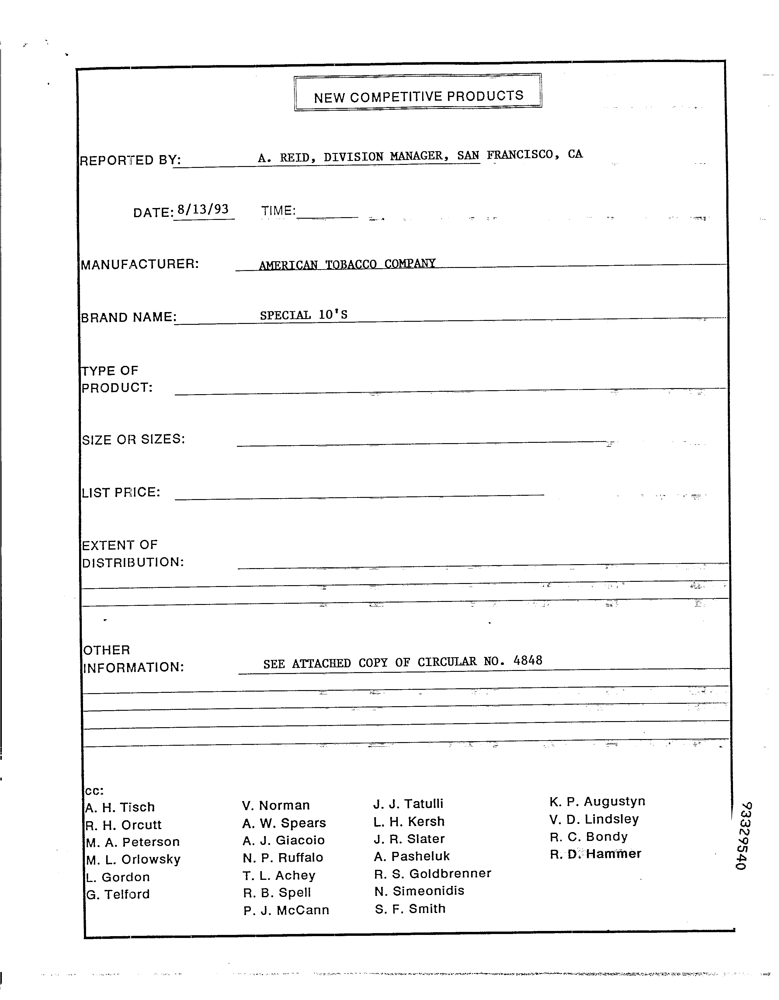

<function destroyAllWindows>

In [49]:
## Load sample image using cv2
img_cv = cv2.imread(sample3)
print('Product_Form')
cv2_imshow(img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows

In [50]:
## cv2 show numpy array
type(img_cv)

numpy.ndarray

### Extract Text using Pytesseract

#### Image to String/Text

In [51]:
## Extract text from image_opencv
txt_cv = pyt.image_to_string(img_cv)
print(txt_cv)

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

_——— a]
| NeW COMPETITIVE PRODUCTS |
Ee
REPORTED BY: ‘A. REID, DIVISION MANAGER, SAN FRANCISCO, CA
DATE: 8/13/93 TIME: .
MANUFACTURER: AMERICAN TOBAGCO COMPANY
|BRAND NAME: SPECIAL 10'S _

YPE OF
PRODUCT: ]
ISIZE OR SIZES: .
lLisT PRICE:

EXTENT OF

DISTRIBUTION:

OTHER

INFORMATION: SEE ATTACHED COPY OF CIRCULAR NO. 4848
Joc:

. H. Tisch V. Norman J. J. Tatulli K.P. Augustyn 0
IR. H. Orcutt A.W, Spears LH. Kersh V. D. Lindsley 3
I. A. Peterson A. J. Giacoio J. R. Slater RC. Bondy x
IM. L. Orlowsky N.P. Ruffalo A. Pasheluk R. D. Hammer g
L. Gordon T. L. Achey R. 8. Goldbrenner S

R. B. Spell N. Simeonidis
S.F. Smith

IG. Telford
P. J. McCann,

 

 



#### Image to Data
- It will give us image in unstructured format which we have to convert it into structured format

Pytesseract will give us 5 levels
- level1 - Page number
- level2 - Block number
- level3 - paragraph number
- level4 - line number
- level5 - word/ letter

In [52]:
## Image to data which give us details of the image in unstructured format
data = pyt.image_to_data(img_cv)
print(data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	779	1000	-1	
2	1	1	0	0	0	0	49	6	706	-1	
3	1	1	1	0	0	0	49	6	706	-1	
4	1	1	1	1	0	0	49	6	706	-1	
5	1	1	1	1	1	0	49	6	706	95	 
2	1	2	0	0	0	131	59	593	10	-1	
3	1	2	1	0	0	131	59	593	10	-1	
4	1	2	1	1	0	131	59	593	10	-1	
5	1	2	1	1	1	131	59	593	10	95	 
2	1	3	0	0	0	293	208	2	2	-1	
3	1	3	1	0	0	293	208	2	2	-1	
4	1	3	1	1	0	293	208	2	2	-1	
5	1	3	1	1	1	293	208	2	2	95	 
2	1	4	0	0	0	370	214	18	10	-1	
3	1	4	1	0	0	370	214	18	10	-1	
4	1	4	1	1	0	370	214	18	10	-1	
5	1	4	1	1	1	370	214	18	10	95	 
2	1	5	0	0	0	174	317	540	7	-1	
3	1	5	1	0	0	174	317	540	7	-1	
4	1	5	1	1	0	174	317	540	7	-1	
5	1	5	1	1	1	174	317	540	7	95	 
2	1	6	0	0	0	175	386	544	9	-1	
3	1	6	1	0	0	175	386	544	9	-1	
4	1	6	1	1	0	175	386	544	9	-1	
5	1	6	1	1	1	175	386	544	9	95	 
2	1	7	0	0	0	82	578	646	11	-1	
3	1	7	1	0	0	82	578	646	11	-1	
4	1	7	1	1	0	82	578	646	11	-1	
5	1	7	1	1	1	82	578	646	11	95	 
2	1	8	0	0	0	82	596	647	11	-1	
3	1	8	1	0	0	82	596	647	11	-1	
4

## Comments:
Unstructured format is containing 
- level
- page no
- block no
- line no
- word no
- left
- top
- width
- height
- conf i.e. confidance score
- text

In [53]:
## raw data 
data

"level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t779\t1000\t-1\t\n2\t1\t1\t0\t0\t0\t0\t49\t6\t706\t-1\t\n3\t1\t1\t1\t0\t0\t0\t49\t6\t706\t-1\t\n4\t1\t1\t1\t1\t0\t0\t49\t6\t706\t-1\t\n5\t1\t1\t1\t1\t1\t0\t49\t6\t706\t95\t \n2\t1\t2\t0\t0\t0\t131\t59\t593\t10\t-1\t\n3\t1\t2\t1\t0\t0\t131\t59\t593\t10\t-1\t\n4\t1\t2\t1\t1\t0\t131\t59\t593\t10\t-1\t\n5\t1\t2\t1\t1\t1\t131\t59\t593\t10\t95\t \n2\t1\t3\t0\t0\t0\t293\t208\t2\t2\t-1\t\n3\t1\t3\t1\t0\t0\t293\t208\t2\t2\t-1\t\n4\t1\t3\t1\t1\t0\t293\t208\t2\t2\t-1\t\n5\t1\t3\t1\t1\t1\t293\t208\t2\t2\t95\t \n2\t1\t4\t0\t0\t0\t370\t214\t18\t10\t-1\t\n3\t1\t4\t1\t0\t0\t370\t214\t18\t10\t-1\t\n4\t1\t4\t1\t1\t0\t370\t214\t18\t10\t-1\t\n5\t1\t4\t1\t1\t1\t370\t214\t18\t10\t95\t \n2\t1\t5\t0\t0\t0\t174\t317\t540\t7\t-1\t\n3\t1\t5\t1\t0\t0\t174\t317\t540\t7\t-1\t\n4\t1\t5\t1\t1\t0\t174\t317\t540\t7\t-1\t\n5\t1\t5\t1\t1\t1\t174\t317\t540\t7\t95\t \n2\t1\t6\t0\t0\t0\t175\t386\t544\t9\t-1

## Way-1: Convert Unstructured format to Structured format

#### Comm: Data is in Unstructured form , so we have to convert it into Structured or table format
- S1: Separate the data using split(\n) and make it into list
- S2: Split \t and \n and create new list of data
- S3: Convert whole list is into dataframe(table)

S-1: using split separate it into new line

In [54]:
## Split the data in line by line format
data.split('\n')    ## make it in list 

['level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext',
 '1\t1\t0\t0\t0\t0\t0\t0\t779\t1000\t-1\t',
 '2\t1\t1\t0\t0\t0\t0\t49\t6\t706\t-1\t',
 '3\t1\t1\t1\t0\t0\t0\t49\t6\t706\t-1\t',
 '4\t1\t1\t1\t1\t0\t0\t49\t6\t706\t-1\t',
 '5\t1\t1\t1\t1\t1\t0\t49\t6\t706\t95\t ',
 '2\t1\t2\t0\t0\t0\t131\t59\t593\t10\t-1\t',
 '3\t1\t2\t1\t0\t0\t131\t59\t593\t10\t-1\t',
 '4\t1\t2\t1\t1\t0\t131\t59\t593\t10\t-1\t',
 '5\t1\t2\t1\t1\t1\t131\t59\t593\t10\t95\t ',
 '2\t1\t3\t0\t0\t0\t293\t208\t2\t2\t-1\t',
 '3\t1\t3\t1\t0\t0\t293\t208\t2\t2\t-1\t',
 '4\t1\t3\t1\t1\t0\t293\t208\t2\t2\t-1\t',
 '5\t1\t3\t1\t1\t1\t293\t208\t2\t2\t95\t ',
 '2\t1\t4\t0\t0\t0\t370\t214\t18\t10\t-1\t',
 '3\t1\t4\t1\t0\t0\t370\t214\t18\t10\t-1\t',
 '4\t1\t4\t1\t1\t0\t370\t214\t18\t10\t-1\t',
 '5\t1\t4\t1\t1\t1\t370\t214\t18\t10\t95\t ',
 '2\t1\t5\t0\t0\t0\t174\t317\t540\t7\t-1\t',
 '3\t1\t5\t1\t0\t0\t174\t317\t540\t7\t-1\t',
 '4\t1\t5\t1\t1\t0\t174\t317\t540\t7\t-1\t',
 '5\t1\t5\t1\t1\t1\

In [55]:
data.split('\n')[0]  ## checking 1st line

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext'

## S-2: 
- Separate it by \t using map

In [56]:
## S-2: now one more split based on \t i.e we have to create a nested list and iterate over whole
data_list = list(map(lambda x: x.split('\t'),data.split('\n')))
data_list

[['level',
  'page_num',
  'block_num',
  'par_num',
  'line_num',
  'word_num',
  'left',
  'top',
  'width',
  'height',
  'conf',
  'text'],
 ['1', '1', '0', '0', '0', '0', '0', '0', '779', '1000', '-1', ''],
 ['2', '1', '1', '0', '0', '0', '0', '49', '6', '706', '-1', ''],
 ['3', '1', '1', '1', '0', '0', '0', '49', '6', '706', '-1', ''],
 ['4', '1', '1', '1', '1', '0', '0', '49', '6', '706', '-1', ''],
 ['5', '1', '1', '1', '1', '1', '0', '49', '6', '706', '95', ' '],
 ['2', '1', '2', '0', '0', '0', '131', '59', '593', '10', '-1', ''],
 ['3', '1', '2', '1', '0', '0', '131', '59', '593', '10', '-1', ''],
 ['4', '1', '2', '1', '1', '0', '131', '59', '593', '10', '-1', ''],
 ['5', '1', '2', '1', '1', '1', '131', '59', '593', '10', '95', ' '],
 ['2', '1', '3', '0', '0', '0', '293', '208', '2', '2', '-1', ''],
 ['3', '1', '3', '1', '0', '0', '293', '208', '2', '2', '-1', ''],
 ['4', '1', '3', '1', '1', '0', '293', '208', '2', '2', '-1', ''],
 ['5', '1', '3', '1', '1', '1', '293', '208',

In [57]:
data_list[0]   ## these will be the column

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text']

In [58]:
data_list[1]     ## these will be the value

['1', '1', '0', '0', '0', '0', '0', '0', '779', '1000', '-1', '']

In [59]:
data_list[1:]     ## from now onwards these will be the rows of value

[['1', '1', '0', '0', '0', '0', '0', '0', '779', '1000', '-1', ''],
 ['2', '1', '1', '0', '0', '0', '0', '49', '6', '706', '-1', ''],
 ['3', '1', '1', '1', '0', '0', '0', '49', '6', '706', '-1', ''],
 ['4', '1', '1', '1', '1', '0', '0', '49', '6', '706', '-1', ''],
 ['5', '1', '1', '1', '1', '1', '0', '49', '6', '706', '95', ' '],
 ['2', '1', '2', '0', '0', '0', '131', '59', '593', '10', '-1', ''],
 ['3', '1', '2', '1', '0', '0', '131', '59', '593', '10', '-1', ''],
 ['4', '1', '2', '1', '1', '0', '131', '59', '593', '10', '-1', ''],
 ['5', '1', '2', '1', '1', '1', '131', '59', '593', '10', '95', ' '],
 ['2', '1', '3', '0', '0', '0', '293', '208', '2', '2', '-1', ''],
 ['3', '1', '3', '1', '0', '0', '293', '208', '2', '2', '-1', ''],
 ['4', '1', '3', '1', '1', '0', '293', '208', '2', '2', '-1', ''],
 ['5', '1', '3', '1', '1', '1', '293', '208', '2', '2', '95', ' '],
 ['2', '1', '4', '0', '0', '0', '370', '214', '18', '10', '-1', ''],
 ['3', '1', '4', '1', '0', '0', '370', '214', '18', 

In [60]:
## S3: Make it in the dataframe
df = pd.DataFrame(data_list[1:], columns = data_list[0])
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,779,1000,-1,
1,2,1,1,0,0,0,0,49,6,706,-1,
2,3,1,1,1,0,0,0,49,6,706,-1,
3,4,1,1,1,1,0,0,49,6,706,-1,
4,5,1,1,1,1,1,0,49,6,706,95,
...,...,...,...,...,...,...,...,...,...,...,...,...
220,2,1,19,0,0,0,387,968,315,12,-1,
221,3,1,19,1,0,0,387,968,315,12,-1,
222,4,1,19,1,1,0,387,968,315,12,-1,
223,5,1,19,1,1,1,387,968,315,12,95,


In [61]:
df.head(15)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,779,1000,-1,
1,2,1,1,0,0,0,0,49,6,706,-1,
2,3,1,1,1,0,0,0,49,6,706,-1,
3,4,1,1,1,1,0,0,49,6,706,-1,
4,5,1,1,1,1,1,0,49,6,706,95,
5,2,1,2,0,0,0,131,59,593,10,-1,
6,3,1,2,1,0,0,131,59,593,10,-1,
7,4,1,2,1,1,0,131,59,593,10,-1,
8,5,1,2,1,1,1,131,59,593,10,95,
9,2,1,3,0,0,0,293,208,2,2,-1,


### Note for bbox:
- left: left position
- top: top position
- width: width of the box pixel
- height: height of the box pixel
- conf: confidence score
- e.g. Cell has in level-5, in page number 1, block number 3, paragraph number 1, line number 1, word number 1, left position 722, top position 53, width 64p, height 38p with confidence score 92%
- level-5 is always show the text

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      225 non-null    object
 1   page_num   224 non-null    object
 2   block_num  224 non-null    object
 3   par_num    224 non-null    object
 4   line_num   224 non-null    object
 5   word_num   224 non-null    object
 6   left       224 non-null    object
 7   top        224 non-null    object
 8   width      224 non-null    object
 9   height     224 non-null    object
 10  conf       224 non-null    object
 11  text       224 non-null    object
dtypes: object(12)
memory usage: 21.2+ KB


#### Comments on missing value and datatype:
- We have to drop the missing value
- All these datatype is object type but excpet text all are integer or float type, so we have to convert these datatype

In [63]:
## Droping missing value
df.dropna(inplace = True)

In [64]:
df.isnull().sum()

level        0
page_num     0
block_num    0
par_num      0
line_num     0
word_num     0
left         0
top          0
width        0
height       0
conf         0
text         0
dtype: int64

In [65]:
## Change the datatype
cols = ['level', 'page_num', 'block_num', 'par_num' , 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf']
df[cols] = df[cols].astype('int')

In [66]:
df.dtypes

level         int64
page_num      int64
block_num     int64
par_num       int64
line_num      int64
word_num      int64
left          int64
top           int64
width         int64
height        int64
conf          int64
text         object
dtype: object

## Comments:
- Missing value dropped and datatype changed successfully
- Now our image data is in table format for further task

## Way-2
- We can also make it in structured form directly


In [67]:
from pytesseract import Output

In [68]:
data_dict = pyt.image_to_data(img_cv, output_type=Output.DICT,lang='eng')


In [69]:
type(data_dict)

dict

In [70]:
data_dict.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [71]:
## make it into dataframe
df1 = pd.DataFrame.from_dict(data_dict)

In [72]:
df1.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,779,1000,-1,
1,2,1,1,0,0,0,0,49,6,706,-1,
2,3,1,1,1,0,0,0,49,6,706,-1,
3,4,1,1,1,1,0,0,49,6,706,-1,
4,5,1,1,1,1,1,0,49,6,706,95,


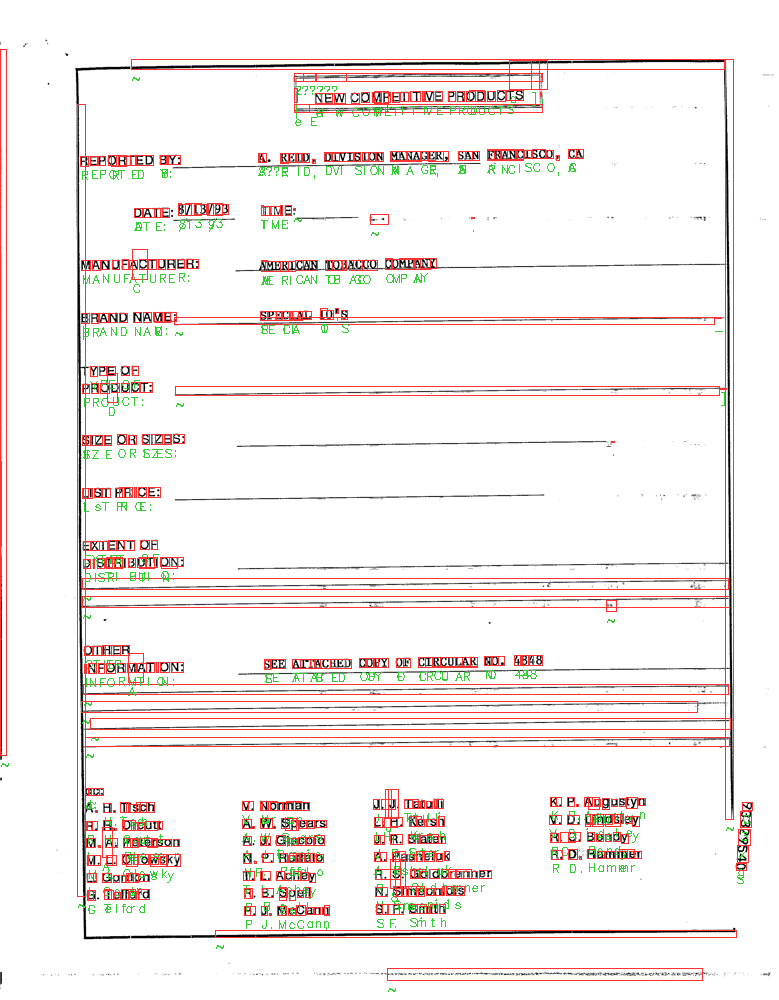

In [73]:
## Annotation 

hImg, wImg, _ = img_cv.shape

boxes = pyt.image_to_boxes(img_cv)
for b in boxes.splitlines():
  b = b.split(' ')
  # print(b)
  x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
  cv2.rectangle(img_cv, (x, hImg - y), (w, hImg - h), (50, 50, 255), 1)
  cv2.putText(img_cv, b[0], (x, hImg - y + 13), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (50, 205, 50), 1)

cv2_imshow(img_cv)